In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Input

In [2]:
# Directories for train data
train_dir = r"C:\Users\MrLaptop\Desktop\dvv\train"
closed_eyes_dir = os.path.join(train_dir, "Closed_Eyes")
open_eyes_dir = os.path.join(train_dir, "Open_Eyes")

In [3]:
# Visualize the number of images in each class
print(f"Number of Closed Eye Images: {len(os.listdir(closed_eyes_dir))}")
print(f"Number of Open Eye Images: {len(os.listdir(open_eyes_dir))}")

Number of Closed Eye Images: 2000
Number of Open Eye Images: 2000


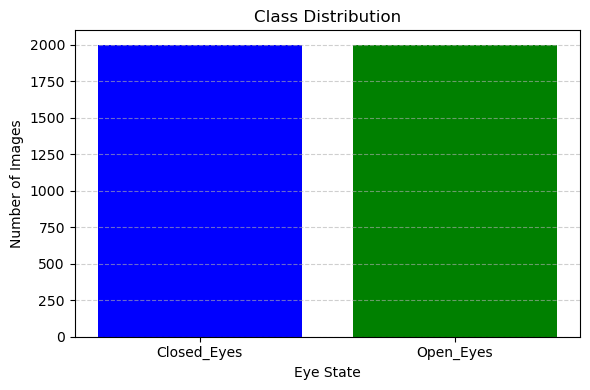

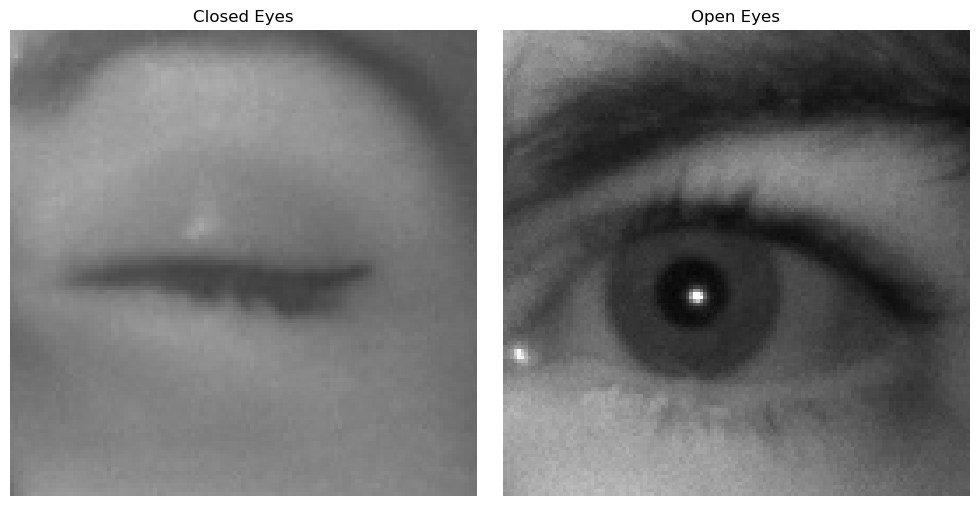

In [4]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Define directories
train_dir = r"C:\Users\MrLaptop\Desktop\dvv\train"
closed_eyes_dir = os.path.join(train_dir, "Closed_Eyes")
open_eyes_dir = os.path.join(train_dir, "Open_Eyes")

# Count number of images in each folder
closed_images = [img for img in os.listdir(closed_eyes_dir) if img.endswith(('.png', '.jpg', '.jpeg'))]
open_images = [img for img in os.listdir(open_eyes_dir) if img.endswith(('.png', '.jpg', '.jpeg'))]

class_counts = {
    "Closed_Eyes": len(closed_images),
    "Open_Eyes": len(open_images)
}

# Plot class distribution
def plot_class_distribution(counts):
    plt.figure(figsize=(6, 4))
    plt.bar(counts.keys(), counts.values(), color=['blue', 'green'])
    plt.title("Class Distribution")
    plt.ylabel("Number of Images")
    plt.xlabel("Eye State")
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# Display one random image from each class
def display_sample_images():
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Closed Eyes
    closed_path = os.path.join(closed_eyes_dir, np.random.choice(closed_images))
    closed_img = cv2.imread(closed_path)
    closed_img = cv2.cvtColor(closed_img, cv2.COLOR_BGR2RGB)
    axs[0].imshow(closed_img)
    axs[0].set_title("Closed Eyes")
    axs[0].axis('off')

    # Open Eyes
    open_path = os.path.join(open_eyes_dir, np.random.choice(open_images))
    open_img = cv2.imread(open_path)
    open_img = cv2.cvtColor(open_img, cv2.COLOR_BGR2RGB)
    axs[1].imshow(open_img)
    axs[1].set_title("Open Eyes")
    axs[1].axis('off')

    plt.tight_layout()
    plt.show()

# Run EDA
plot_class_distribution(class_counts)
display_sample_images()


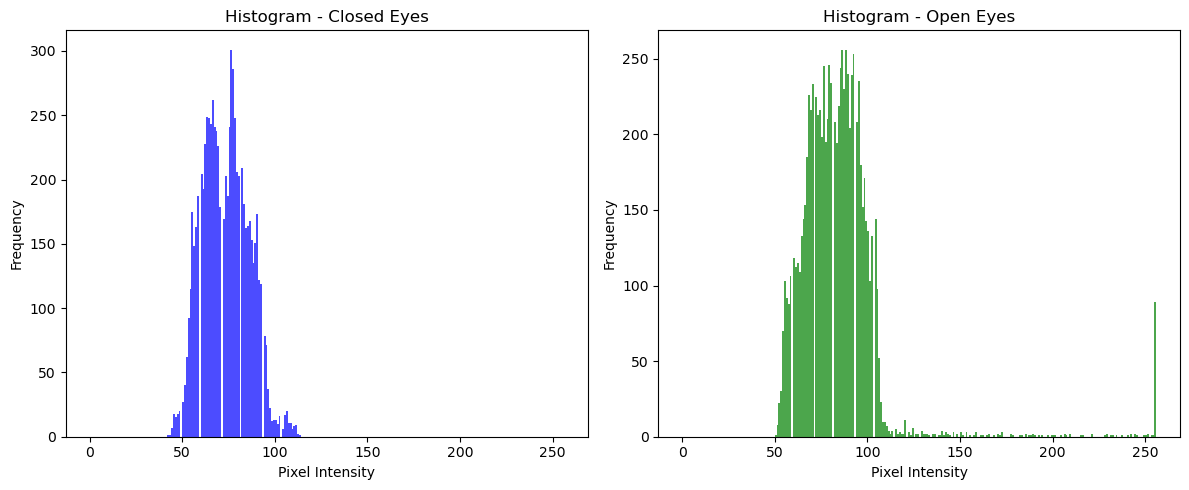

In [5]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np


train_dir = r"C:\Users\MrLaptop\Desktop\dvv\train"
closed_eyes_dir = os.path.join(train_dir, "Closed_Eyes")
open_eyes_dir = os.path.join(train_dir, "Open_Eyes")


closed_images = [img for img in os.listdir(closed_eyes_dir) if img.endswith(('.png', '.jpg', '.jpeg'))]
open_images = [img for img in os.listdir(open_eyes_dir) if img.endswith(('.png', '.jpg', '.jpeg'))]

# Select one random image from each class
closed_img_path = os.path.join(closed_eyes_dir, np.random.choice(closed_images))
open_img_path = os.path.join(open_eyes_dir, np.random.choice(open_images))

# Load images in grayscale
closed_img = cv2.imread(closed_img_path, cv2.IMREAD_GRAYSCALE)
open_img = cv2.imread(open_img_path, cv2.IMREAD_GRAYSCALE)

# Plot histograms
plt.figure(figsize=(12, 5))

# Histogram for Closed Eyes
plt.subplot(1, 2, 1)
plt.hist(closed_img.ravel(), bins=256, range=(0, 256), color='blue', alpha=0.7)
plt.title("Histogram - Closed Eyes")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

# Histogram for Open Eyes
plt.subplot(1, 2, 2)
plt.hist(open_img.ravel(), bins=256, range=(0, 256), color='green', alpha=0.7)
plt.title("Histogram - Open Eyes")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


In [6]:
# Parameters
IMG_SIZE = (64, 64)  # Resize all images to 64x64
BATCH_SIZE = 32

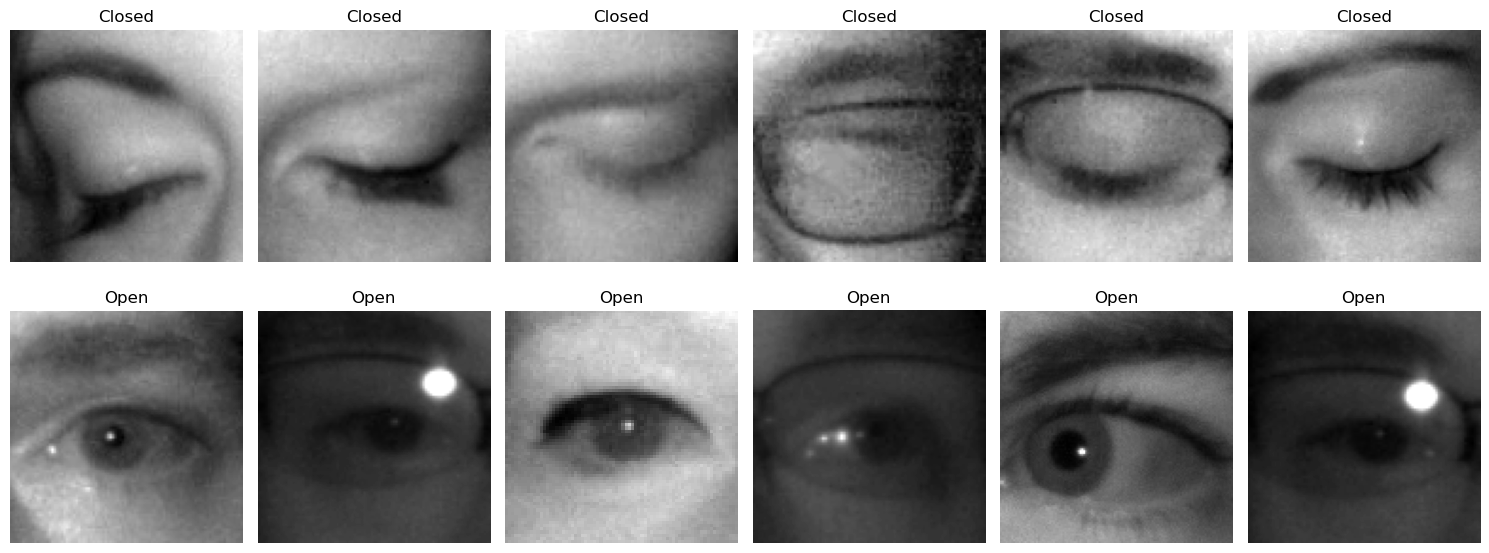

In [7]:
import random
from PIL import Image
closed_images = [os.path.join(closed_eyes_dir, fname) for fname in os.listdir(closed_eyes_dir)]
open_images = [os.path.join(open_eyes_dir, fname) for fname in os.listdir(open_eyes_dir)]

# Randomly select 6 from each
selected_closed = random.sample(closed_images, 6)
selected_open = random.sample(open_images, 6)
selected_images = selected_closed + selected_open
labels = ['Closed'] * 6 + ['Open'] * 6

# Plot
plt.figure(figsize=(15, 6))
for i, (img_path, label) in enumerate(zip(selected_images, labels)):
    img = Image.open(img_path)
    plt.subplot(2, 6, i + 1)
    plt.imshow(img,cmap='gray')
    plt.title(label)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [8]:

train_datagen = ImageDataGenerator(
    rescale=1./255,       
    validation_split=0.2,  
    rotation_range=15,    
    width_shift_range=0.1,
    height_shift_range=0.1 
)

Found 3200 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


C:\Users\MrLaptop\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


C:\Users\MrLaptop\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 76s 684ms/step - accuracy: 0.6092 - loss: 0.6278 - val_accuracy: 0.7875 - val_loss: 0.4772
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 148ms/step - accuracy: 0.8758 - loss: 0.2745 - val_accuracy: 0.9350 - val_loss: 0.3018
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 161ms/step - accuracy: 0.9122 - loss: 0.2044 - val_accuracy: 0.8075 - val_loss: 0.3865
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 168ms/step - accuracy: 0.9354 - loss: 0.1702 - val_accuracy: 0.8487 - val_loss: 0.3234
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 151ms/step - accuracy: 0.9400 - loss: 0.1489 - val_accuracy: 0.8637 - val_loss: 0.3198


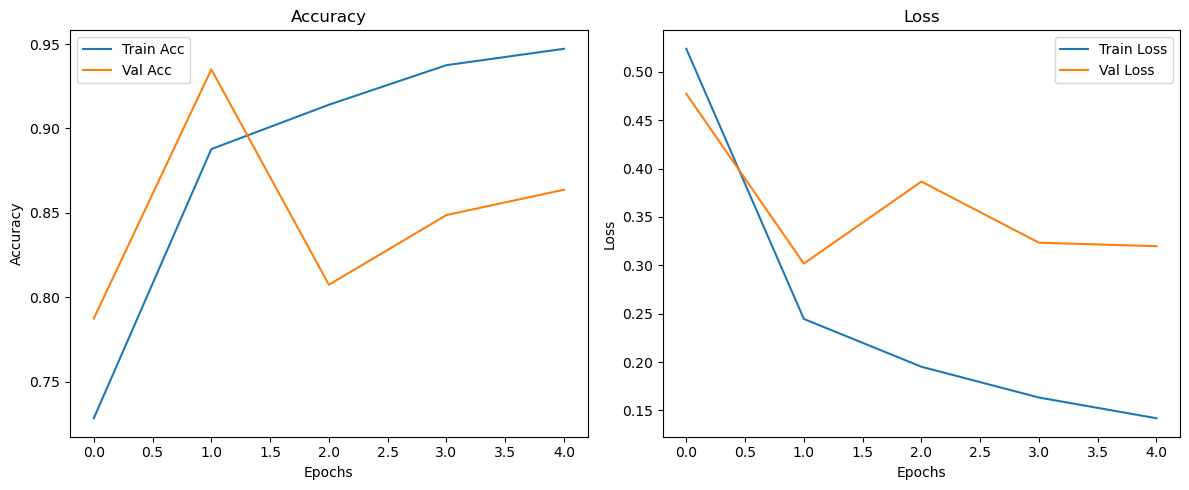

25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step
Classification Report:

              precision    recall  f1-score   support

 Closed_Eyes       0.78      1.00      0.87       400
   Open_Eyes       1.00      0.71      0.83       400

    accuracy                           0.85       800
   macro avg       0.89      0.85      0.85       800
weighted avg       0.89      0.85      0.85       800



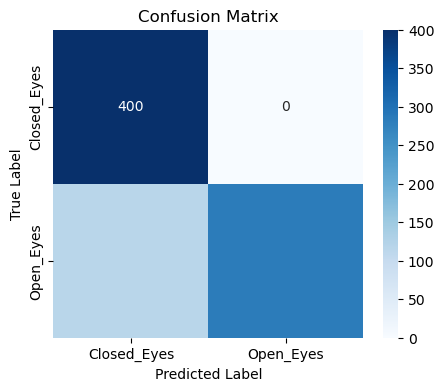

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


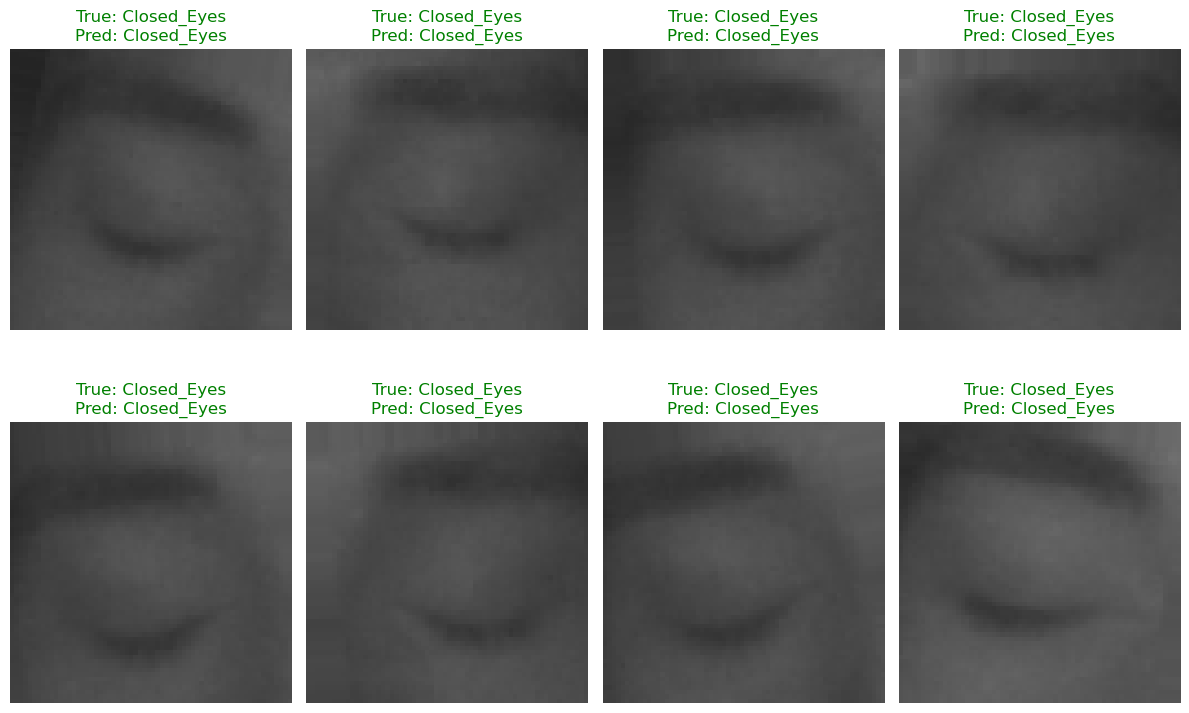

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Image size
IMG_SIZE = (64, 64)
BATCH_SIZE = 32

# Data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

# CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5
)

# Plot accuracy and loss curves
def plot_training_curves(history):
    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_curves(history)

# Classification report
val_generator.reset()
preds = model.predict(val_generator)
y_pred = (preds > 0.5).astype(int)
y_true = val_generator.classes

print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=list(val_generator.class_indices.keys())))

# Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title("Confusion Matrix")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()

plot_confusion_matrix(y_true, y_pred, classes=list(val_generator.class_indices.keys()))

# Visualize prediction results
def visualize_predictions(model, generator, class_indices):
    class_names = list(class_indices.keys())
    images, labels = next(generator)

    preds = model.predict(images)
    preds_class = (preds > 0.5).astype(int).flatten()

    plt.figure(figsize=(12, 8))
    for i in range(8):
        plt.subplot(2, 4, i+1)
        img = images[i]
        true_label = class_names[int(labels[i])]
        pred_label = class_names[int(preds_class[i])]
        color = 'green' if true_label == pred_label else 'red'
        plt.imshow(img)
        plt.title(f'True: {true_label}\nPred: {pred_label}', color=color)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

visualize_predictions(model, val_generator, val_generator.class_indices)


Found 3200 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 17,926,209 (68.38 MB)

 Trainable params: 3,211,521 (12.25 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/5


C:\Users\MrLaptop\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 520s 5s/step - accuracy: 0.7496 - loss: 0.4808 - val_accuracy: 0.6750 - val_loss: 0.5275
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 508s 5s/step - accuracy: 0.9666 - loss: 0.1426 - val_accuracy: 0.6900 - val_loss: 0.5510
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 389s 4s/step - accuracy: 0.9667 - loss: 0.1061 - val_accuracy: 0.6725 - val_loss: 0.5797
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 404s 4s/step - accuracy: 0.9814 - loss: 0.0658 - val_accuracy: 0.7350 - val_loss: 0.4830
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 395s 4s/step - accuracy: 0.9898 - loss: 0.0459 - val_accuracy: 0.8537 - val_loss: 0.3254


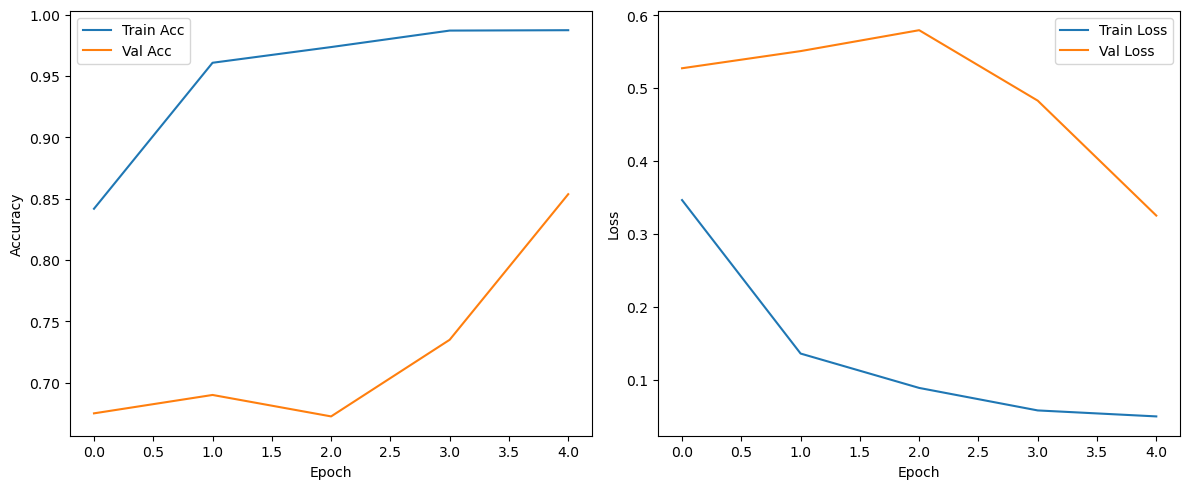

25/25 ━━━━━━━━━━━━━━━━━━━━ 73s 3s/step

Classification Report:

              precision    recall  f1-score   support

 Closed_Eyes       0.76      1.00      0.86       400
   Open_Eyes       1.00      0.69      0.81       400

    accuracy                           0.84       800
   macro avg       0.88      0.84      0.84       800
weighted avg       0.88      0.84      0.84       800



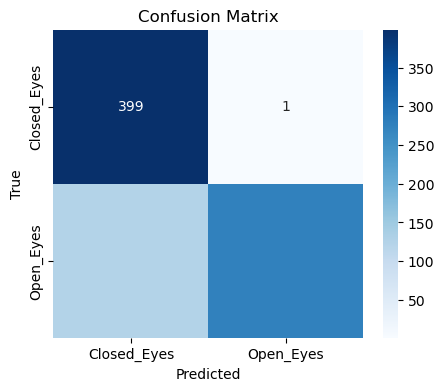

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


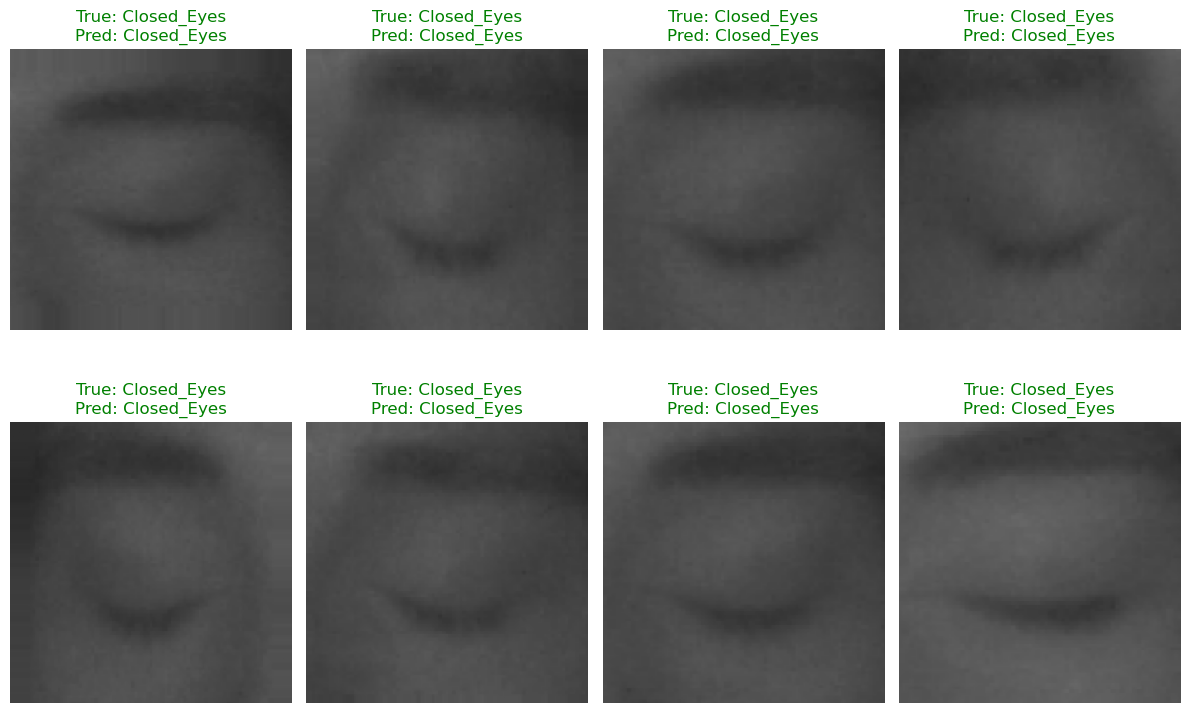

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

# Parameters
IMG_SIZE = (224, 224)  # VGG expected input
BATCH_SIZE = 32
LEARNING_RATE = 1e-4
EPOCHS = 5

# Data Generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

# Load base VGG16 model
base_model = VGG16(weights='imagenet', include_top=False,
                   input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))

# Freeze base layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classifier head
x = base_model.output
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=Adam(LEARNING_RATE),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS
)

# Plot training curves
def plot_training(history):
    plt.figure(figsize=(12,5))
    # Accuracy plot
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.legend()
    # Loss plot
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.legend()
    plt.tight_layout(); plt.show()

plot_training(history)

# Evaluate and visualize predictions
val_generator.reset()
preds = model.predict(val_generator)
y_pred = (preds > 0.5).astype(int).flatten()
y_true = val_generator.classes
class_names = list(val_generator.class_indices.keys())

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted'); plt.ylabel('True'); plt.title('Confusion Matrix')
plt.show()

# Sample predictions
def visualize_predictions(model, generator, class_names):
    imgs, labels = next(generator)
    preds = model.predict(imgs)
    pred_labels = (preds > 0.5).astype(int).flatten()

    plt.figure(figsize=(12,8))
    for i in range(8):
        plt.subplot(2,4,i+1)
        plt.imshow(imgs[i])
        true_lbl = class_names[int(labels[i])]
        pred_lbl = class_names[pred_labels[i]]
        color = 'green' if true_lbl == pred_lbl else 'red'
        plt.title(f"True: {true_lbl}\nPred: {pred_lbl}", color=color)
        plt.axis('off')
    plt.tight_layout(); plt.show()

visualize_predictions(model, val_generator, class_names)


Found 3200 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


C:\Users\MrLaptop\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


C:\Users\MrLaptop\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 48s 412ms/step - accuracy: 0.8165 - loss: 1.1254 - val_accuracy: 0.5000 - val_loss: 1.6689
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 196ms/step - accuracy: 0.9396 - loss: 0.8627 - val_accuracy: 0.5000 - val_loss: 2.0702
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 195ms/step - accuracy: 0.9563 - loss: 0.8174 - val_accuracy: 0.5000 - val_loss: 2.1859
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 201ms/step - accuracy: 0.9702 - loss: 0.7716 - val_accuracy: 0.5375 - val_loss: 1.7378
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 196ms/step - accuracy: 0.9832 - loss: 0.7192 - val_accuracy: 0.7763 - val_loss: 1.2227
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 200ms/step - accuracy: 0.9828 - loss: 0.6988 - val_accuracy: 0.7912 - val_loss: 1.2331
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 196ms/step - accuracy: 0.9817 - loss: 0.6898 - val_accuracy: 0.6600 - val_loss: 1.8891
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 206ms/step - accuracy: 0.9872 - loss: 0.6702 - val

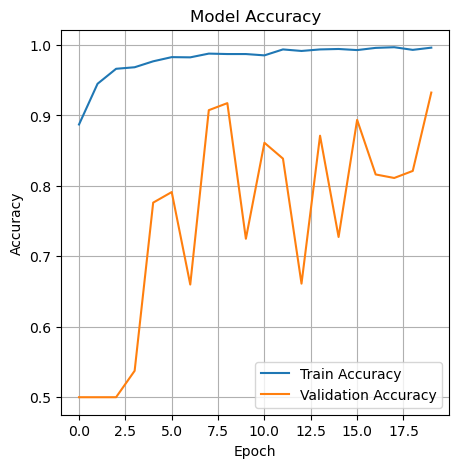

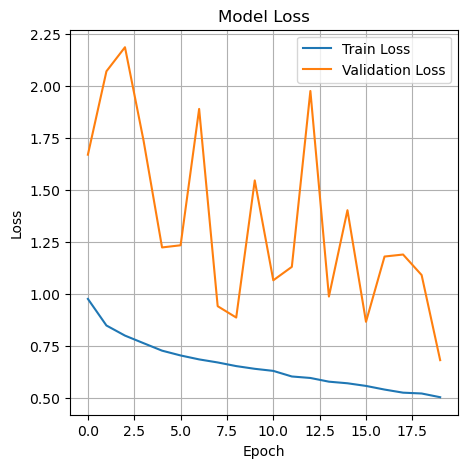

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Settings
IMG_SIZE = (64, 64)
BATCH_SIZE = 32
EPOCHS = 20
train_dir = r"C:\Users\MrLaptop\Desktop\dvv\train"

# Data generator with internal validation split
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.2  # 20% of training data for validation
)

# Train and validation generators from the same directory
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

# CNN model
def create_refined_cnn(input_shape=(64, 64, 3), l2_lambda=0.001):
    model = Sequential()

    # Block 1
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same',
                     kernel_regularizer=l2(l2_lambda), input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same',
                     kernel_regularizer=l2(l2_lambda)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Block 2
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same',
                     kernel_regularizer=l2(l2_lambda)))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same',
                     kernel_regularizer=l2(l2_lambda)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))

    # Block 3
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same',
                     kernel_regularizer=l2(l2_lambda)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))

    # Fully connected
    model.add(Flatten())
    model.add(Dense(256, activation='relu', kernel_regularizer=l2(l2_lambda)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    # Compile
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Train the model
model = create_refined_cnn()
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS
)

# Plot accuracy
plt.figure(figsize=(5, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot loss
plt.figure(figsize=(5, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


Found 3200 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


C:\Users\MrLaptop\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


C:\Users\MrLaptop\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 94s 743ms/step - accuracy: 0.8383 - loss: 1.0779 - val_accuracy: 0.5000 - val_loss: 2.0511
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 28s 271ms/step - accuracy: 0.9480 - loss: 0.8513 - val_accuracy: 0.5000 - val_loss: 3.5336
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 28s 272ms/step - accuracy: 0.9648 - loss: 0.7816 - val_accuracy: 0.5000 - val_loss: 3.7207
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 28s 266ms/step - accuracy: 0.9704 - loss: 0.7633 - val_accuracy: 0.5000 - val_loss: 4.3567
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 28s 267ms/step - accuracy: 0.9800 - loss: 0.7205 - val_accuracy: 0.5000 - val_loss: 3.7641
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 28s 271ms/step - accuracy: 0.9793 - loss: 0.7077 - val_accuracy: 0.5825 - val_loss: 2.2793
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 28s 271ms/step - accuracy: 0.9867 - loss: 0.6791 - val_accuracy: 0.7275 - val_loss: 1.6014
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 28s 269ms/step - accuracy: 0.9881 - loss: 0.6664 - val

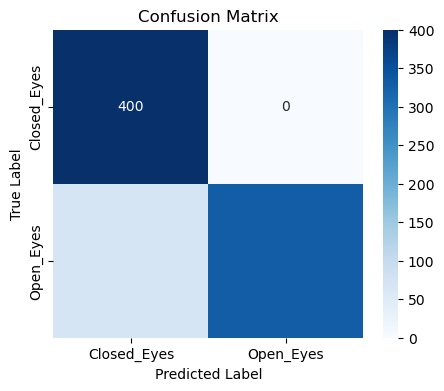

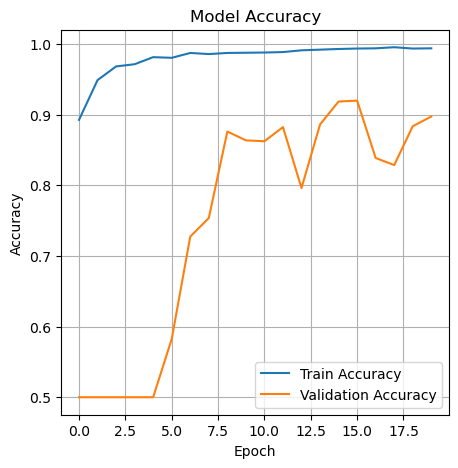

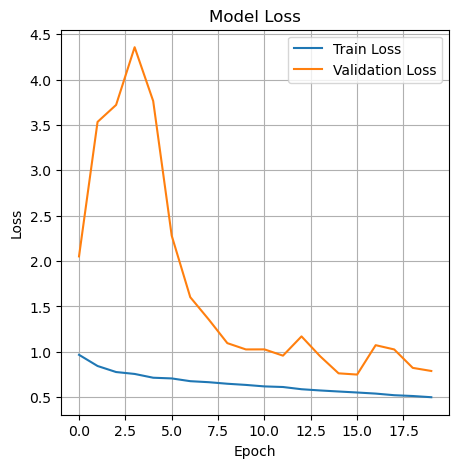

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns

# Settings
IMG_SIZE = (64, 64)
BATCH_SIZE = 32
EPOCHS = 20
train_dir = r"C:\Users\MrLaptop\Desktop\dvv\train"

# Data generator with internal validation split
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.2  # 20% of training data for validation
)

# Train and validation generators from the same directory
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

# CNN model
def create_refined_cnn(input_shape=(64, 64, 3), l2_lambda=0.001):
    model = Sequential()

    # Block 1
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same',
                     kernel_regularizer=l2(l2_lambda), input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same',
                     kernel_regularizer=l2(l2_lambda)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Block 2
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same',
                     kernel_regularizer=l2(l2_lambda)))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same',
                     kernel_regularizer=l2(l2_lambda)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))

    # Block 3
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same',
                     kernel_regularizer=l2(l2_lambda)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))

    # Fully connected
    model.add(Flatten())
    model.add(Dense(256, activation='relu', kernel_regularizer=l2(l2_lambda)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    # Compile
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Train the model
model = create_refined_cnn()
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS
)

# === Classification Report & Confusion Matrix ===
val_generator.reset()
true_labels = val_generator.classes
class_labels = list(val_generator.class_indices.keys())

# Predictions
pred_probs = model.predict(val_generator)
pred_labels = (pred_probs > 0.5).astype(int).ravel()

# Print classification report
print("\nClassification Report:\n")
print(classification_report(true_labels, pred_labels, target_names=class_labels))

# Confusion matrix
cm = confusion_matrix(true_labels, pred_labels)
print("\nConfusion Matrix:\n", cm)

# Plot confusion matrix heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

# === Plot Accuracy ===
plt.figure(figsize=(5, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# === Plot Loss ===
plt.figure(figsize=(5, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


Found 3200 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


C:\Users\MrLaptop\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


C:\Users\MrLaptop\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 101s 812ms/step - accuracy: 0.8099 - loss: 1.1479 - val_accuracy: 0.5000 - val_loss: 2.8338
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 29s 280ms/step - accuracy: 0.9375 - loss: 0.8648 - val_accuracy: 0.5000 - val_loss: 4.4808
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 30s 290ms/step - accuracy: 0.9627 - loss: 0.7964 - val_accuracy: 0.5000 - val_loss: 4.7473
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 29s 280ms/step - accuracy: 0.9728 - loss: 0.7572 - val_accuracy: 0.5000 - val_loss: 4.2050
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 28s 276ms/step - accuracy: 0.9799 - loss: 0.7242 - val_accuracy: 0.5013 - val_loss: 3.3232
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 250ms/step - accuracy: 0.9781 - loss: 0.7132 - val_accuracy: 0.5300 - val_loss: 2.4730
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 187ms/step - accuracy: 0.9825 - loss: 0.6930 - val_accuracy: 0.6538 - val_loss: 1.8557
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 189ms/step - accuracy: 0.9917 - loss: 0.6593 - va

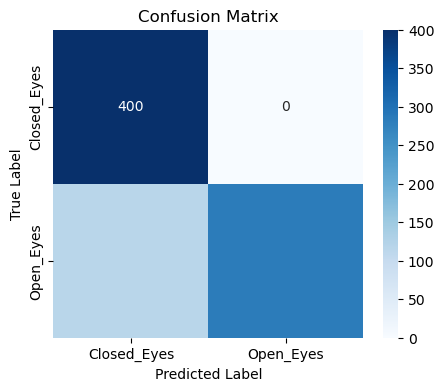

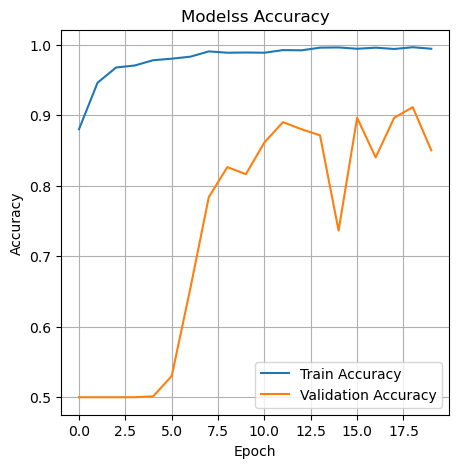

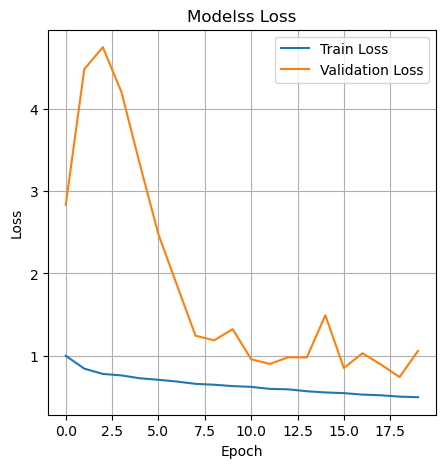

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns

# Settings
IMG_SIZE = (64, 64)
BATCH_SIZE = 32
EPOCHS = 20
train_dir = r"C:\Users\MrLaptop\Desktop\dvv\train"

# Data generator with internal validation split
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.2  # 20% of training data for validation
)

# Train and validation generators from the same directory
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

# CNN modelss
def create_refined_cnn(input_shape=(64, 64, 3), l2_lambda=0.001):
    modelss = Sequential()

    # Block 1
    modelss.add(Conv2D(32, (3, 3), activation='relu', padding='same',
                     kernel_regularizer=l2(l2_lambda), input_shape=input_shape))
    modelss.add(BatchNormalization())
    modelss.add(Conv2D(32, (3, 3), activation='relu', padding='same',
                     kernel_regularizer=l2(l2_lambda)))
    modelss.add(BatchNormalization())
    modelss.add(MaxPooling2D(pool_size=(2, 2)))
    modelss.add(Dropout(0.25))

    # Block 2
    modelss.add(Conv2D(64, (3, 3), activation='relu', padding='same',
                     kernel_regularizer=l2(l2_lambda)))
    modelss.add(BatchNormalization())
    modelss.add(Conv2D(64, (3, 3), activation='relu', padding='same',
                     kernel_regularizer=l2(l2_lambda)))
    modelss.add(BatchNormalization())
    modelss.add(MaxPooling2D(pool_size=(2, 2)))
    modelss.add(Dropout(0.3))

    # Block 3
    modelss.add(Conv2D(128, (3, 3), activation='relu', padding='same',
                     kernel_regularizer=l2(l2_lambda)))
    modelss.add(BatchNormalization())
    modelss.add(MaxPooling2D(pool_size=(2, 2)))
    modelss.add(Dropout(0.4))

    # Fully connected
    modelss.add(Flatten())
    modelss.add(Dense(256, activation='relu', kernel_regularizer=l2(l2_lambda)))
    modelss.add(BatchNormalization())
    modelss.add(Dropout(0.5))
    modelss.add(Dense(1, activation='sigmoid'))

    # Compile
    modelss.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return modelss

# Train the modelss
modelss = create_refined_cnn()
history = modelss.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS
)

# === Classification Report & Confusion Matrix ===
val_generator.reset()
true_labels = val_generator.classes
class_labels = list(val_generator.class_indices.keys())

# Predictions
pred_probs = modelss.predict(val_generator)
pred_labels = (pred_probs > 0.5).astype(int).ravel()

# Print classification report
print("\nClassification Report:\n")
print(classification_report(true_labels, pred_labels, target_names=class_labels))

# Confusion matrix
cm = confusion_matrix(true_labels, pred_labels)
print("\nConfusion Matrix:\n", cm)

# Plot confusion matrix heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

# === Plot Accuracy ===
plt.figure(figsize=(5, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Modelss Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# === Plot Loss ===
plt.figure(figsize=(5, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Modelss Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
